In [4]:
# importing the requirement modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

In [5]:
# getting the iris data for performaing the naive bayes

iris_df=pd.read_csv('./csv_files/iris.csv')

In [7]:
# displaying the data

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# checking the shape of data

iris_df.shape

(150, 5)

In [11]:
# describing the dataset

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# finding the meta data of the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# finding the missing values

iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# we dont have missing records in our dataset, which means we can train the model 

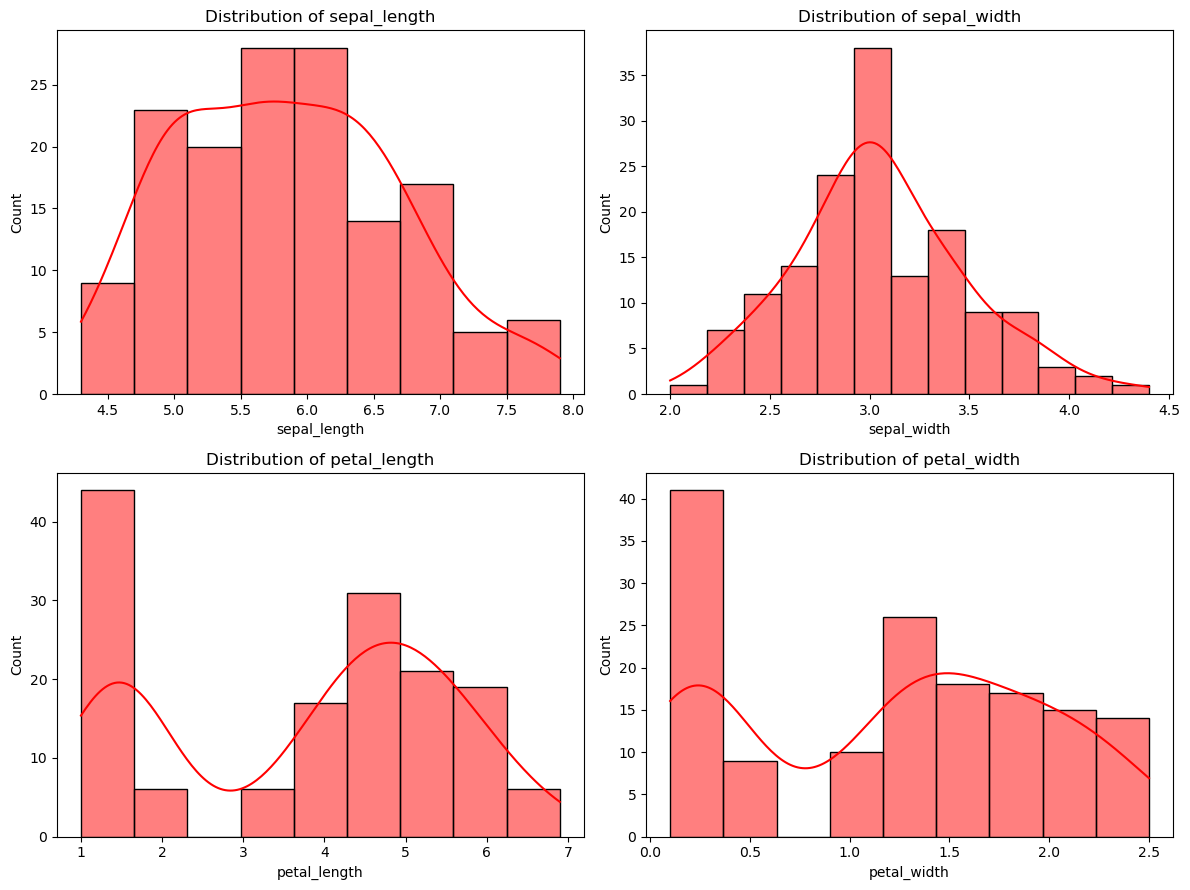

In [84]:
# finding the distribution of the data which describes the:
# 1) how much features data points have distributed or spread in data(checks the normal (GAUSSIAN) distribution)
# 2) skeweness in the data points
# 3) we can identify the outliers using the distribution

plt.figure(figsize=(12,9))
for i, column in enumerate(iris_df.columns[:-1],1): # we are taking the each features from dataset excluding target feature and this are itreable 
    plt.subplot(2,2,i)  # creating the sub plot that will display the each features of dataset
    sns.histplot(iris_df[column],kde=True, color='red') # creating the histogram and kernal distribution estimation smoothen on datapoints
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

The Correlation matrix is: 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000



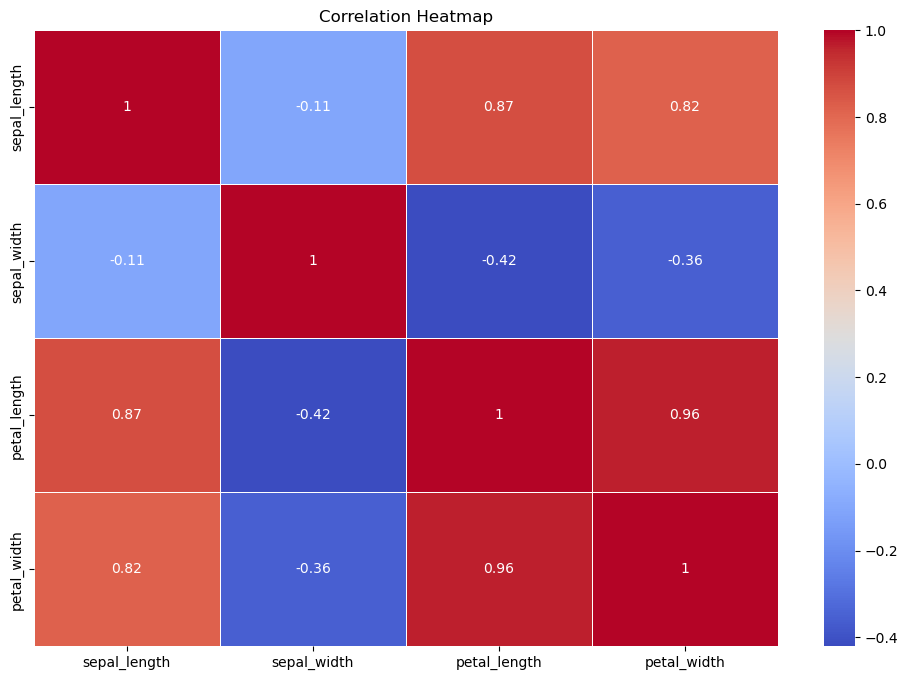

In [75]:
# finding the correlation between the features 

correlation_matrix = iris_df.iloc[:, :-1].corr()  # Finds the correlation coefficients(PEARSON CORRELATION) between multiple variables (range -1 to +1)
print(f"The Correlation matrix is: \n{correlation_matrix}\n")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # displays the heatmap (correlation matrix) 
plt.title("Correlation Heatmap")
plt.show()

In [83]:
# dividing the dataset into independent and dependent feature

x=iris_df.iloc[:,:-1] # selects the independent features
y=iris_df.iloc[:,-1] # selects the target feature

In [25]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [28]:
# Now we are spliting the data into training and testing part

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=42)

In [82]:
# displaying the traing data

x_train, y_train 

(     sepal_length  sepal_width  petal_length  petal_width
 81            5.5          2.4           3.7          1.0
 133           6.3          2.8           5.1          1.5
 137           6.4          3.1           5.5          1.8
 75            6.6          3.0           4.4          1.4
 109           7.2          3.6           6.1          2.5
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [105 rows x 4 columns],
 81     versicolor
 133     virginica
 137     virginica
 75     versicolor
 109     virginica
           ...    
 71     versicolor
 106     virginica
 14         setosa
 92     versicolor
 102     virginica
 Name: species, Length: 105, dtype: object)

In [81]:
# displaying the testing data

x_test, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2.9           4.5          1.5
 76            6.8          2.8           4.8          1.4
 31            5.4          3.4           1.5          0.4
 64            5.6          2.9           3.6          1.3
 141           6.9          3.1           5.1          2.3
 68            6.2          2.2           4.5          1.5
 82            5.8          2.7           3.9          1.2
 110           6.5          3.2           5.1          2.0
 12            4.8          3.0           1.4          0.1
 36            5.5          3.5           1.3          0.2
 9             4.9          3.1           1.5          0.1
 19            5.1          3.8           1.5          0.3
 56            6.3          3.3           4.7          1

In [36]:
# selecting the model


NB_model=GaussianNB()
NB_model  # model has been selected

GaussianNB()

In [38]:
# fitting the model i.e fitting the training data points in to the model

NB_model.fit(x_train,y_train) # model has been fitted with training dataset-

GaussianNB()

In [39]:
# now, we have to make some prdiction on testing data

prediction_data=NB_model.predict(x_test)

In [80]:
# predicted data points are

prediction_data

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype='<U10')

In [43]:
# comparing the actual data points or predicting data points

compareing = np.vstack((y_test,prediction_data)).T

In [79]:
compareing[:10,:] # dispaling top 10 

array([['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor']], dtype=object)

In [50]:
# creating the confusion matrix

conf = confusion_matrix(y_test, prediction_data)
print(f'The confusion matrix of this Logistic Regression is: \n{conf}')

The confusion matrix of this Logistic Regression is: 
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [71]:
# finding the correct and false prediction and the accuracy using the confusion matrix

shape_conf = conf.shape
correct_Pred = 0
false_Pred = 0

for row in range(shape_conf[0]):
    for column in range(shape_conf[1]):
        if row == column:
            correct_Pred +=conf[row,column]
        else:
            false_Pred += conf[row,column]
print('Correct predictions: ', correct_Pred)
print('False predictions', false_Pred)
print ('Accuracy of the Naive Bayes Clasification is: ', correct_Pred/(conf.sum()))            

Correct predictions:  44
False predictions 1
Accuracy of the Naive Bayes Clasification is:  0.9777777777777777


In [76]:
# findiing the accuracy of the model

print ("The accuracy of Naive Bayes is : ", accuracy_score(y_test, prediction_data))

The accuracy of Naive Bayes is :  0.9777777777777777


In [77]:
# finding the F1-SCORE of the model

print("The F1-Score of Navie Bayes is: ",f1_score(y_test,prediction_data,average='weighted'))

The F1-Score of Navie Bayes is:  0.9777448559670782


In [78]:
# finding the Precision of the model

precision = precision_score(y_test, prediction_data, average='weighted')
print("Precision Score of Navie Bayes is:", precision)

Precision Score of logistic Regression is: 0.9793650793650793


In [63]:
#finding the RECALL-SCORE of the model

recall = recall_score(y_test, prediction_data,average='weighted')
print("Recall Score Naive Bayes is:", recall)

Recall Score of logistic Regression is: 0.9777777777777777
